In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# read the file
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# display all the column names
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [4]:
# what is the size of the data
data.shape

(545, 13)

In [5]:
#how many categorical columns are there
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
# how many continous columns are there

In [7]:
# Check for missing values - handle the missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


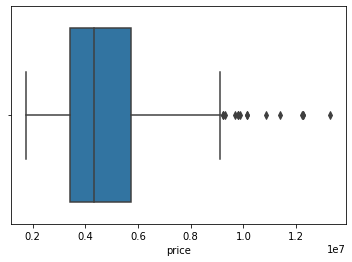

In [9]:
# check for  outliers - remove outliers
import seaborn as sns
sns.boxplot(x=data['price'])

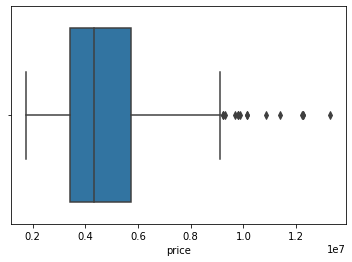

In [10]:
sns.boxplot(x=data['price'])

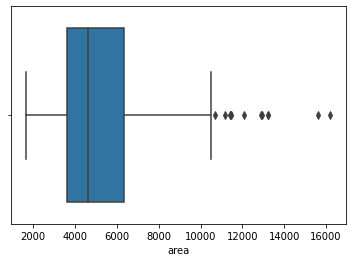

In [11]:
sns.boxplot(x=data['area'])

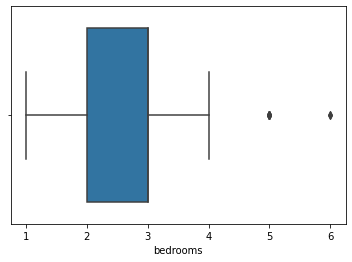

In [12]:
sns.boxplot(x=data['bedrooms'])

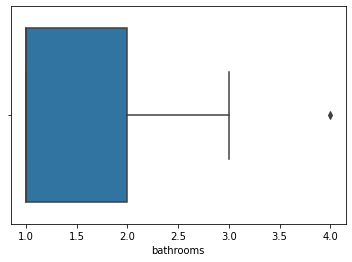

In [13]:
sns.boxplot(x=data['bathrooms'])

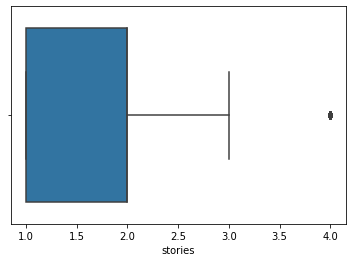

In [14]:
sns.boxplot(x=data['stories'])

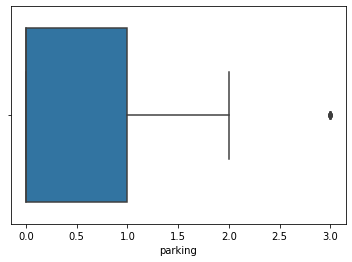

In [15]:
sns.boxplot(x=data['parking'])

In [16]:
 def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)

        col_vals = df.columns
        for col in col_vals:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in col_vals:
            df1[col] = df[col]

        return(df1)
        

In [17]:
df1 = mod_outlier(data)

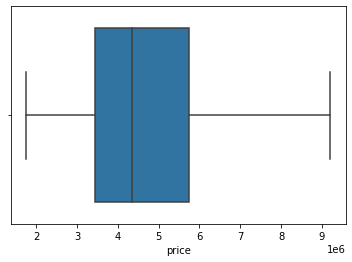

In [18]:
sns.boxplot(x=df1['price'])

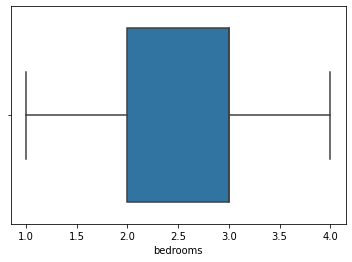

In [19]:
sns.boxplot(x=df1['bedrooms'])

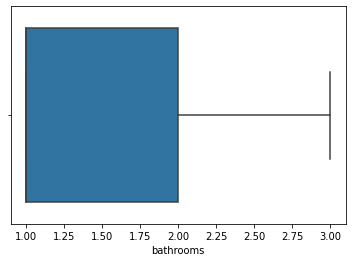

In [20]:
sns.boxplot(x=df1['bathrooms'])

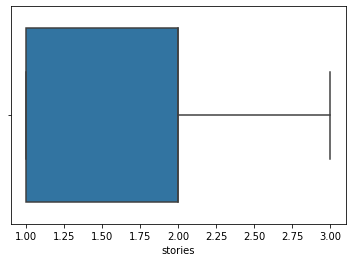

In [21]:
sns.boxplot(x=df1['stories'])

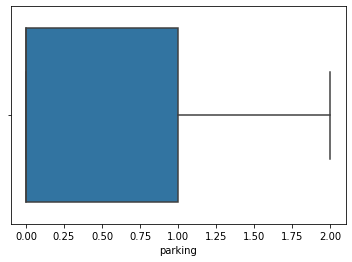

In [22]:
sns.boxplot(x=df1['parking'])

In [23]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.727388e+06,5102.249541,2.939450,1.284404,1.730275,0.671560
std,1.745227e+06,2005.804353,0.676553,0.494301,0.701037,0.813726
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,9.205000e+06,10500.000000,4.000000,3.000000,3.000000,2.000000


In [24]:
df1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.727388e+06,5102.249541,2.939450,1.284404,1.730275,0.671560
std,1.745227e+06,2005.804353,0.676553,0.494301,0.701037,0.813726
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,9.205000e+06,10500.000000,4.000000,3.000000,3.000000,2.000000


In [25]:
for col in df1.columns:
  print("================="+col+"======================")
  print(data[col].value_counts())

=================price======================
4200000    17
3500000    17
9205000    15
4900000    12
3640000     9
           ..
7910000     1
7525000     1
8890000     1
2852500     1
8960000     1
Name: price, Length: 209, dtype: int64
=================area======================
6000     24
10500    15
3000     14
4500     13
4000     11
         ..
1650      1
8800      1
4700      1
7770      1
10240     1
Name: area, Length: 273, dtype: int64
=================bedrooms======================
3    300
2    136
4    107
1      2
Name: bedrooms, dtype: int64
=================bathrooms======================
1    401
2    133
3     11
Name: bathrooms, dtype: int64
=================stories======================
2    238
1    227
3     80
Name: stories, dtype: int64
=================mainroad======================
yes    468
no      77
Name: mainroad, dtype: int64
=================guestroom======================
no     448
yes     97
Name: guestroom, dtype: int64
=================basement==

In [26]:
df1.drop(df1[df1["bedrooms"]==1].index, axis=0, inplace=True)
df1.drop(df1[df1["bathrooms"]==3].index, axis=0, inplace=True)
df1 = df1.drop("hotwaterheating", axis=1)

In [27]:
for col in df1.columns:
  print("================="+col+"======================")
  print(df1[col].value_counts())

=================price======================
3500000    17
4200000    16
4900000    12
9205000    10
5250000     9
           ..
3836000     1
7910000     1
7525000     1
8890000     1
8960000     1
Name: price, Length: 208, dtype: int64
=================area======================
6000     23
3000     14
10500    14
4500     13
4000     11
         ..
1650      1
8800      1
4700      1
7770      1
10240     1
Name: area, Length: 271, dtype: int64
=================bedrooms======================
3    296
2    136
4    100
Name: bedrooms, dtype: int64
=================bathrooms======================
1    399
2    133
Name: bathrooms, dtype: int64
=================stories======================
2    230
1    224
3     78
Name: stories, dtype: int64
=================mainroad======================
yes    458
no      74
Name: mainroad, dtype: int64
=================guestroom======================
no     438
yes     94
Name: guestroom, dtype: int64
=================basement====================

In [28]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,9205000,7420,4,2,3,yes,no,no,yes,2,yes,furnished
2,9205000,9960,3,2,2,yes,no,yes,no,2,yes,semi-furnished
3,9205000,7500,4,2,2,yes,no,yes,yes,2,yes,furnished
4,9205000,7420,4,1,2,yes,yes,yes,yes,2,no,furnished
8,9205000,8100,4,1,2,yes,yes,yes,yes,2,yes,furnished


In [29]:
furniture = pd.get_dummies(df1['furnishingstatus'])
df1['mainroad'] = df1['mainroad'].map({'yes': 1, 'no': 0})
df1['guestroom'] = df1['guestroom'].map({'yes': 1, 'no': 0})
df1['airconditioning'] = df1['airconditioning'].map({'yes': 1, 'no': 0})
df1['basement'] = df1['basement'].map({'yes': 1, 'no': 0})
df1['prefarea'] = df1['prefarea'].map({'yes': 1, 'no': 0})
df1 = df1.drop("furnishingstatus", axis=1)
df1 = pd.concat([df1,furniture],axis=1)

In [30]:
y = df1['price']
df1 = df1.drop("price", axis=1)
x = df1


In [31]:
import xgboost
regressor=xgboost.XGBRegressor()

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [32]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,test_size = 0.2, random_state = 13)
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   17.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   34.9s


[19:50:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   51.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [34]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
from sklearn import metrics
y_pre = random_cv.predict(x_test)
metrics.r2_score(y_test, y_pre)

0.7601026262581526

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [40]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [42]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid
            ,scoring='neg_mean_squared_error',n_iter = 10, cv = 5, verbose=2, 
            random_state=42, n_jobs = 1)

In [46]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [47]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1100}

In [48]:
predictions=rf_random.predict(x_test)
metrics.r2_score(y_test, predictions)

0.7620760795619512

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)
print(selection.feature_importances_)

[0.26251041 0.04911766 0.21774511 0.05345748 0.03006644 0.0313796
 0.04515099 0.11021896 0.0621503  0.05023879 0.01817729 0.02023542
 0.04955157]


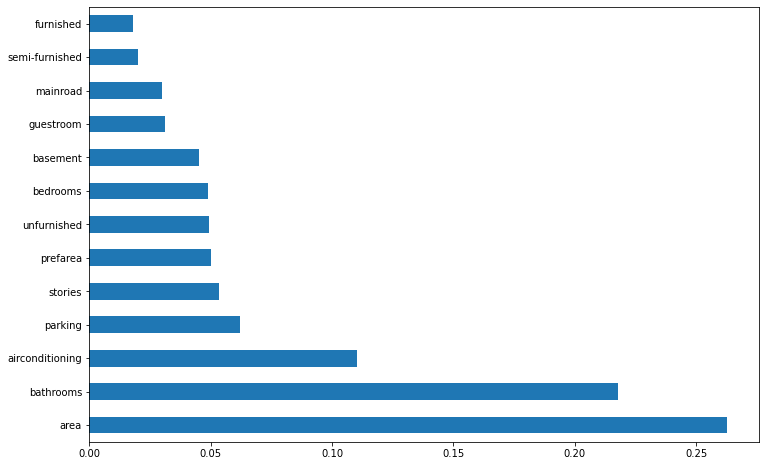

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()